#### <h1> <center> ENGG680 </center></h1>
<h2> <center> Project (47 points)</center></h2>
<center>
<div class="alert alert-block alert-info">
Due: Friday April 22 (midnight). To be submitted on D2L.
</div></center>

Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`. Test your code and when you were done, download this notebook as an `.ipynb` file and submit it to D2L. To get this file, in Jupyter notebook you can go to File -> Download as -> Notebook(.ipynb)

# Accident Prediction
The goal of this project is to get familiar with data wrangling and prepare a machine learning model to have an inital prediction by using real world data set.

Two data set of accident information of Calgary (Traffic_Incidents.csv) and (weather.csv) are given for this prediction.


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import datetime as dt

### Import Traffic_Incidents.csv and set START_DT in csv file as index (1 pts)

In [28]:
# Your solution goes here
df = pd.read_csv("Traffic_Incidents.csv", index_col="START_DT", parse_dates=True)
df.head()

,INCIDENT INFO,DESCRIPTION,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
START_DT,,,,,,,,,
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE,Traffic incident. Blocking a centre lane,2022/01/31 05:44:30 PM,NE,-114.014809,51.066880,1,2022-01-31T17:43:0451.06687980348472-114.01480...,POINT (-114.01480888026677 51.06687980348472)
2022-03-11 17:31:13,Southbound Sarcee Trail at Richmond Road SW,Two vehicle incident. All lanes have reopened,2022/03/11 06:19:20 PM,SW,-114.165814,51.018483,1,2022-03-11T17:31:1351.01848282277337-114.16581...,POINT (-114.16581406053487 51.01848282277337)
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE,Traffic incident. Blocking the right lanes,2022/01/31 05:52:56 PM,NE,-114.014441,51.066894,1,2022-01-31T17:43:0451.066893513842864-114.0144...,POINT (-114.01444107015365 51.066893513842864)
2022-02-24 18:39:51,32 Avenue and 4 Street NW,Traffic incident.,2022/02/24 07:17:02 PM,NW,-114.071537,51.081513,1,2022-02-24T18:39:5151.08151267480019-114.07153...,POINT (-114.07153734738591 51.08151267480019)
2022-03-29 19:18:43,60 Street and 96 Avenue NE,Traffic incident.,2022/03/29 07:19:36 PM,NE,-113.946849,51.139611,1,2022-03-29T19:18:4351.13961051521839-113.94684...,POINT (-113.9468490923995 51.13961051521839)


### Filter "INCIDENT INFO" (i.e. only keep ICIDENT INFO column and drop other columns from dataframe) (1 pts)

In [29]:
# Your solution goes here
df_INC = df.filter(["INCIDENT INFO"],axis=1)
df_INC.head()

,INCIDENT INFO
START_DT,
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE
2022-03-11 17:31:13,Southbound Sarcee Trail at Richmond Road SW
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE
2022-02-24 18:39:51,32 Avenue and 4 Street NW
2022-03-29 19:18:43,60 Street and 96 Avenue NE


### Check and drop null values from dataset if exist (1 pts)

In [30]:
df.isna().sum()


INCIDENT INFO        0
DESCRIPTION          1
MODIFIED_DT      14057
QUADRANT         14059
Longitude            0
Latitude             0
Count                0
id                   0
Point                0
dtype: int64

In [31]:
# Droping Empty columns instead of empty rows Here ↓
df.dropna(inplace=True, axis=1)
df.shape

(31107, 6)

In [32]:
df.describe()

,Longitude,Latitude,Count
count,31107.000000,31107.000000,31107.0
mean,-114.049420,51.037740,1.0
std,0.069958,0.414689,0.0
min,-114.309770,0.005110,1.0
25%,-114.094710,50.995524,1.0
50%,-114.048181,51.047470,1.0
75%,-114.001033,51.085888,1.0
max,-113.871362,51.195648,1.0


### plot daily accident counts (3 Pts)

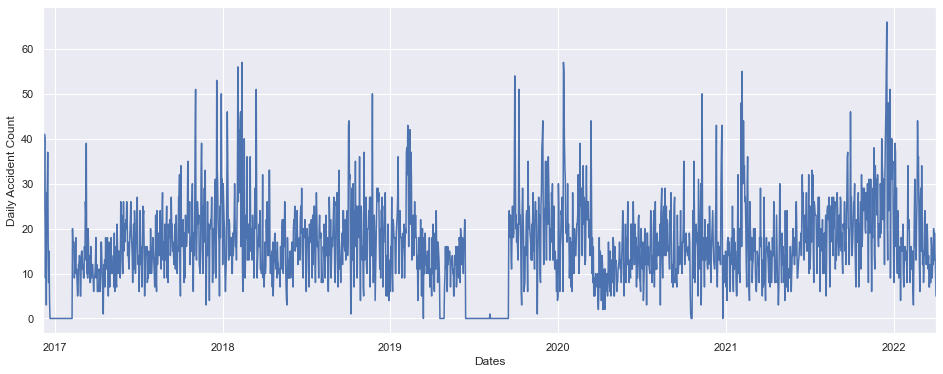

In [33]:
df_daily = df.resample('d').sum()
dailyAcc = df_daily["Count"]
dailyAcc.plot(kind='line', figsize = (16,6)) 
plt.ylabel("Daily Accident Count")
plt.xlabel("Dates")
plt.show()

### plot weekly accident counts (3 Pts)

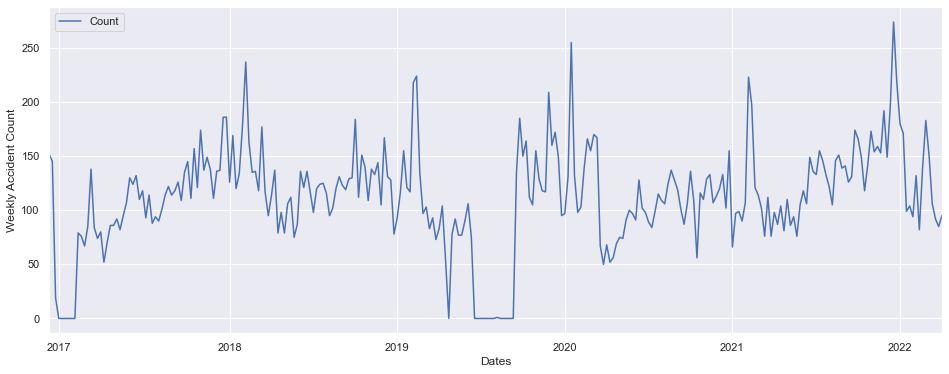

In [34]:
df_weekly = df.resample('w').sum()
df_weekly
df_weekly.plot(y='Count', kind='line', figsize = (16,6)) 
plt.ylabel("Weekly Accident Count")
plt.xlabel("Dates")
plt.show()

### plot the average traffic as a function of the time of the day and explain your observation ( 6 pts: 4 pts code + 2 pts your observation)

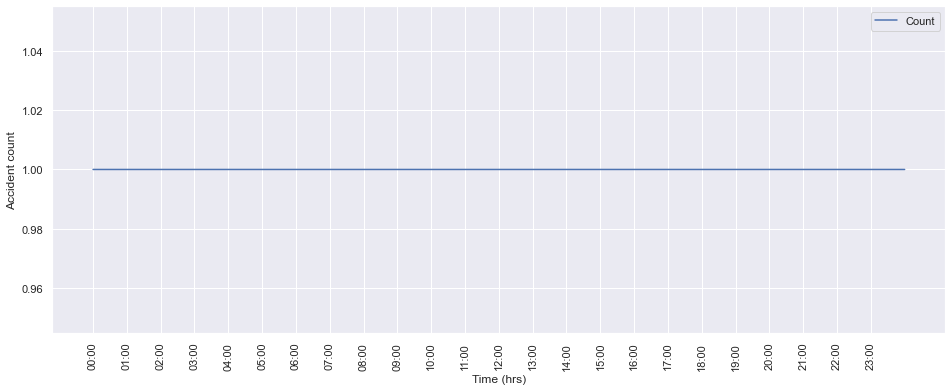

In [35]:
 
gby_time = df.groupby(df.index.time).mean()
gby_time
hourly_ticks = 60*60*np.arange(24)
gby_time.plot(y = 'Count', xticks=hourly_ticks,figsize=(16,6))
plt.xticks(rotation="vertical")
plt.xlabel("Time (hrs)")
plt.ylabel('Accident count')
plt.show()

### Obeservation on Graph: 

`The straight line graph clearly indicates that on an average, 1 accident is occuring at every hour of the day.`

### Plot the average traffic to see how things change based on the day of the week and explain your observation ( 6 pts: 4 pts code + 2 pts your observation)

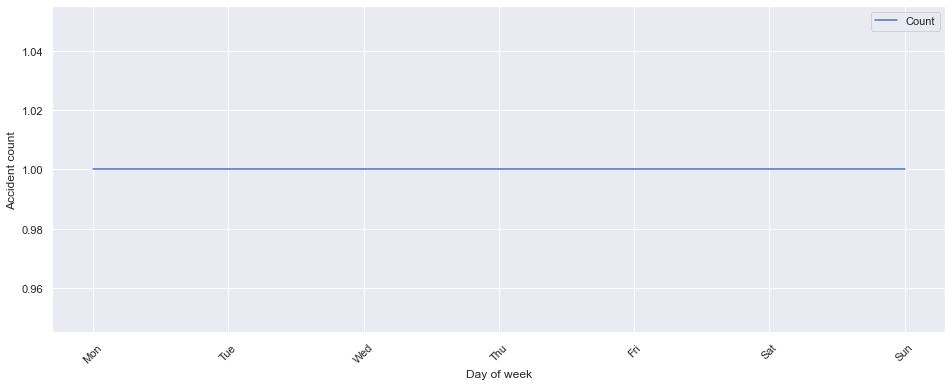

In [36]:

gby_week=df.groupby(df.index.dayofweek).mean()
weekdays = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
gby_week.plot(y = 'Count', figsize=(16,6))
plt.xticks(range(len(weekdays)),weekdays,rotation=45)
plt.xlabel('Day of week')
plt.ylabel('Accident count')
plt.show()

### Obeservation on Graph: 

`The straight line graph clearly indicates that on an average, 1 accident is occuring on every day of the week.`

### plot the hourly trend between weekdays and weekends and explain your observation ( 8 pts: 6 pts code and 2 pts your observation)

In [37]:
weekday_mask = np.where(df.index.weekday < 5, "weekday", "weekend")
gby_hourly = df.groupby([weekday_mask, df.index.hour]).sum()
gby_hourly

Longitude       Latitude  Count
        START_DT                                     
weekday 0         -32388.310600   14498.231112    284
        1         -22013.580758    9853.286250    193
        2         -17905.251128    8014.411102    157
        3         -14712.014302    6584.821517    129
        4         -18359.902422    8216.910940    161
        5         -24291.038852   10872.164309    213
        6         -84500.547073   37817.174850    741
        7        -164794.162100   73742.501877   1445
        8        -184987.900882   82782.691698   1622
        9        -161383.095571   72215.244951   1415
        10       -124891.564166   55893.735989   1095
        11       -123861.715436   55427.656620   1086
        12       -133785.370345   59869.733020   1173
        13       -127736.577413   57163.286591   1120
        14       -162751.939404   72835.025324   1427
        15       -218407.379254   97735.772900   1915
        16       -271889.694130  121678.027347   2384
        17       -285345.896324  127701.707846   2502
        18       -198908.018997   89016.844592   1744
        19       -141987.826563   63546.966951   1245
        20        -98769.270485   44203.967126    866
        21        -79720.496771   35682.974727    699
        22        -68431.376735   30630.493273    600
        23        -53031.355254   23735.470225    465
weekend 0         -23721.002711   10618.900717    208
        1         -19844.932120    8882.144858    174
        2         -14711.983510    6584.486895    129
        3         -11861.285502    5308.659409    104
        4         -11176.096534    5002.305592     98
        5         -11404.070752    5106.071990    100
        6         -14710.738829    6584.433046    129
        7         -16992.987122    7605.262436    149
        8         -21326.886011    9545.734737    187
        9         -23264.785093   10413.077966    204
        10        -33530.660604   15004.317990    294
        11        -35015.293099   15668.923978    307
        12        -46418.682882   20770.571176    407
        13        -50299.026853   22408.207097    441
        14        -52921.587782   23682.673254    464
        15        -55542.598599   24860.922367    487
        16        -49839.808059   22308.290059    437
        17        -47899.967890   21439.013067    420
        18        -47330.629099   21184.334987    415
        19        -40030.271234   17919.587601    351
        20        -31477.273713   14090.710492    276
        21        -23609.307107   10567.252030    207
        22        -26457.601021   11841.100567    232
        23        -23493.546316   10514.896650    206

Text(0, 0.5, 'Accident count')

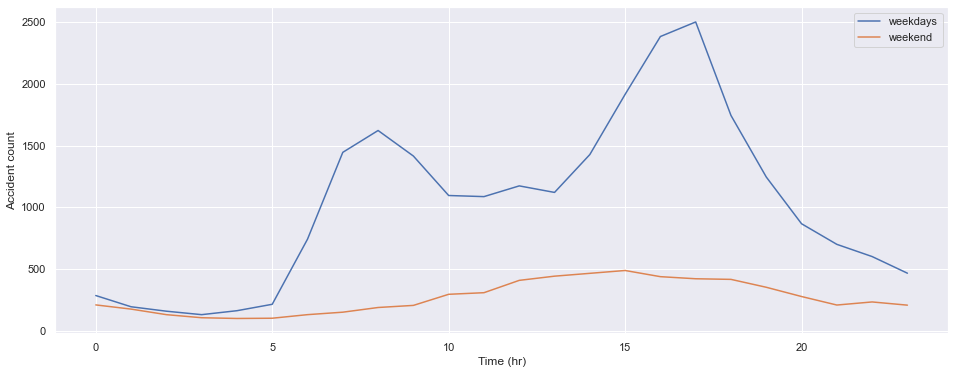

In [51]:
weekdayData = gby_hourly.loc["weekday",:]
weekEndData = gby_hourly.loc["weekend",:]
plt.figure(figsize=(16,6))
plt.plot(weekdayData["Count"],  label="weekdays")
plt.plot(weekEndData["Count"],  label= "weekend")
plt.legend()
plt.xlabel('Time (hr)')
plt.ylabel('Accident count')



### Observation on Graph: 

`For the first 5 hours, 00:00 till 05:00 of the night on weekdays and weekends, the accident count remains almost same i.e. between 200-300 accidents since most people are sleeping. For the next 5 hours, 05:00 till 10:00 when most of the people are commuting to workplaces and schools on weekdays, the accident count rises drastically to the peak of 1700 accidents. However, on weekends most people are at home during the early hours, so the range of accident count remains between 200-300. In the next range of 10:00 to 15:00 hrs, the highest point on the graph is seen at 15:00 hrs with 500 accidents count owing to people doing household chores or going out for sunday brunches. The highest point for weekdays accidents of approx 2500 is seen between 15:00 to 18:00 hrs when most people are leaving from schools and workplaces for homes and most accidents occur during that time. The graph recedes back to below 500 count for the whole week as fewer people are on the road.       `

# Merging Datasets

### Load Daily weather data (weather.csv) (1 pts)

In [39]:
# Your solution goes here
weatherDf = pd.read_csv("weather.csv",index_col="date", parse_dates=True).dropna(axis=1)
Daily_weatherDf = weatherDf.resample('d').mean()
Daily_weatherDf.shape



(3000, 45)

### Extract maximum/minimum temperature and drop Null values (1 pts)

In [40]:
# Your solution goes here
Temperatures = weatherDf[["max_temperature", "min_temperature"]]
#null values dropped while loading data
Temperatures.head()



,max_temperature,min_temperature
date,,
2022-04-02,11.7,-2.0
2022-04-01,9.4,-3.5
2022-03-31,8.1,0.4
2022-03-30,17.7,-3.5
2022-03-29,10.4,-6.5


### Add the following daily features and create your feature matrix: (10 pts)
* X: Weekdays, average daily temperature
* Y: Total number of accidents in that day

In [41]:
newData = df_daily.filter(["Count"], axis=1)
newData

,Count
START_DT,
2016-12-06,11
2016-12-07,24
2016-12-08,27
2016-12-09,41
2016-12-10,40
...,...
2022-03-30,13
2022-03-31,19
2022-04-01,15


In [42]:
print(weekdays)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [43]:
for i in range(7):
    newData[weekdays[i]] = (newData.index.weekday == i).astype(int)
newData.head(5)

,Count,Mon,Tue,Wed,Thu,Fri,Sat,Sun
START_DT,,,,,,,,
2016-12-06,11,0,1,0,0,0,0,0
2016-12-07,24,0,0,1,0,0,0,0
2016-12-08,27,0,0,0,1,0,0,0
2016-12-09,41,0,0,0,0,1,0,0
2016-12-10,40,0,0,0,0,0,1,0


In [44]:
newData = newData.join(Daily_weatherDf["avg_temperature"]).dropna()
# newData.shape
# # newData.isna().sum()

In [45]:
# Your solution goes here
indep_cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'avg_temperature']
x = newData[indep_cols]
y = newData["Count"]

### Create your model and use linearRegression class in sklearn for prediction (3 pts)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(x,y)

LinearRegression(fit_intercept=False)

In [47]:
predictions = model.predict(x)
predictions

array([23.16461713, 24.19225896, 23.90445761, ..., 17.65520802,
       19.62107243, 13.06100487])

### plot and compare your prediction with real accident data (3 pts)

In [53]:
newData1 = newData[["Count"]].copy()
newData1["Prediction"] = predictions
newData1.head()

,Count,Prediction
START_DT,,
2016-12-06,11,23.164617
2016-12-07,24,24.192259
2016-12-08,27,23.904458
2016-12-09,41,25.356747
2016-12-10,40,18.921665


Text(0, 0.5, 'Accident count')

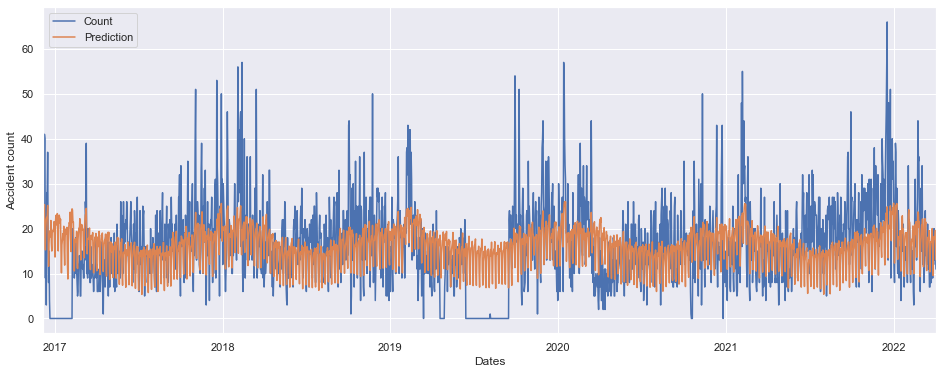

In [49]:
newData1.plot(figsize = (16,6))
plt.xlabel('Dates')
plt.ylabel('Accident count')